In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023/flights_sample_3m.csv
/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023/dictionary.html


In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023/flights_sample_3m.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check dataset info (data types, null values)
df.info()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [4]:
# Option 1: Fill NaN values with 0 (assuming no delay if not recorded)
df.fillna(0, inplace=True)

# Option 2: Drop rows with missing values (if few)
# df.dropna(inplace=True)

# Check if missing values are handled
df.isnull().sum()


FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

In [5]:
# Create a Total Delay column
df['TOTAL_DELAY'] = df['DELAY_DUE_CARRIER'] + df['DELAY_DUE_WEATHER'] + df['DELAY_DUE_NAS'] + df['DELAY_DUE_SECURITY'] + df['DELAY_DUE_LATE_AIRCRAFT']

# Create a binary label for delay (1 if delay > 15 mins, else 0)
df['IS_DELAYED'] = df['TOTAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)


In [6]:
# Check the distribution of the new 'IS_DELAYED' feature
df['IS_DELAYED'].value_counts()


IS_DELAYED
0    2484711
1     515289
Name: count, dtype: int64

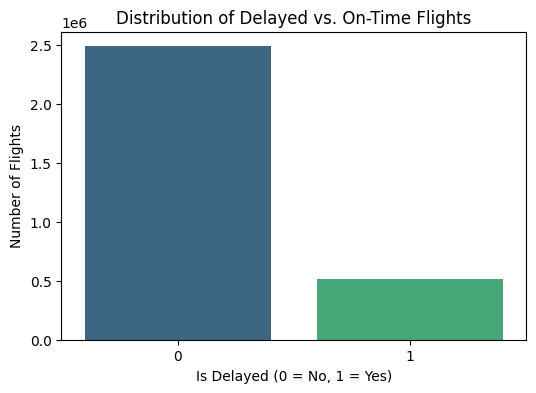

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of delayed vs. on-time flights
plt.figure(figsize=(6, 4))
sns.countplot(x='IS_DELAYED', data=df, palette='viridis')
plt.title('Distribution of Delayed vs. On-Time Flights')
plt.xlabel('Is Delayed (0 = No, 1 = Yes)')
plt.ylabel('Number of Flights')
plt.show()


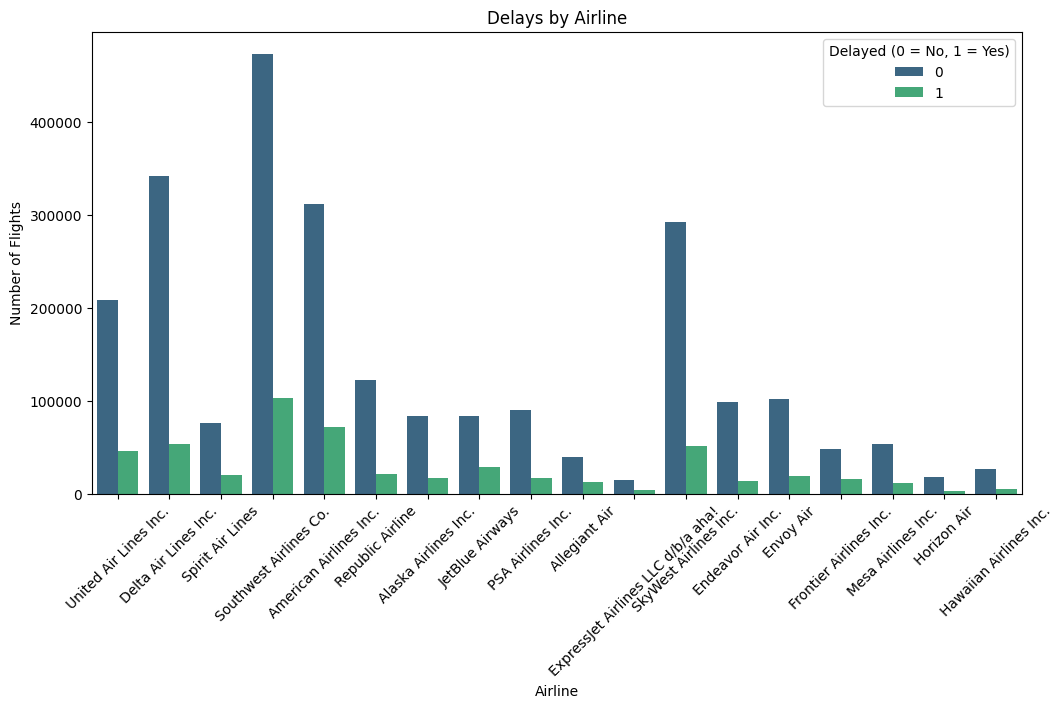

In [8]:
# Plot delays by airline
plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE', hue='IS_DELAYED', data=df, palette='viridis')
plt.title('Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.legend(title='Delayed (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Display all column names to identify the correct time-related column
print(df.columns)


Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'TOTAL_DELAY', 'IS_DELAYED'],
      dtype='object')


In [10]:
# Check available columns again to confirm the correct time column
print(df.columns)


Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'TOTAL_DELAY', 'IS_DELAYED'],
      dtype='object')


In [11]:
# Safely create DEPARTURE_HOUR from DEP_TIME
df['DEPARTURE_HOUR'] = df['DEP_TIME'].apply(lambda x: int(str(x).zfill(4)[:2]) if pd.notnull(x) else -1)

# Confirm the column is created
print(df[['DEP_TIME', 'DEPARTURE_HOUR']].head())


   DEP_TIME  DEPARTURE_HOUR
0    1151.0              11
1    2114.0              21
2    1000.0              10
3    1608.0              16
4    1838.0              18


In [12]:
# Check unique values in the DEPARTURE_HOUR column
print(df['DEPARTURE_HOUR'].unique())


[11 21 10 16 18 12 52 19 82 55  0 17 14 15 80 72 83 90 13 63 85 20 71 22
 93 75 60 74 61 92 50 65 62 91 81 84 54 70 73 51 94 23 29 95 53 24 64 47
 45 27  5 48 31  3 49 44 57 35  2 37  4 39 33 42 38 34 43  1 58  9  6 25
 30  7  8 36 59 28 32 26 46 56 40 41]


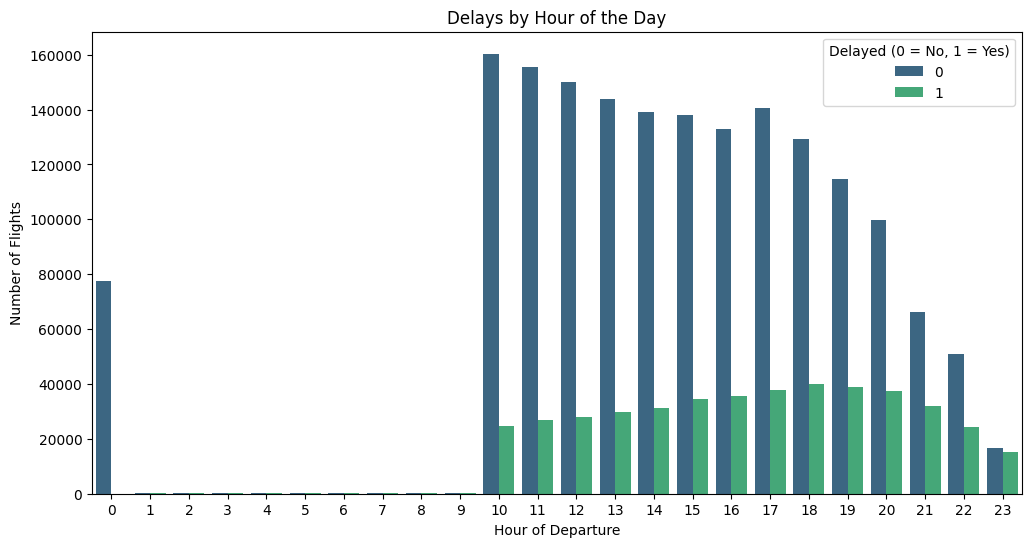

In [13]:
# Filter invalid hours (0–23 only)
df = df[df['DEPARTURE_HOUR'].between(0, 23)]

# Plot with clearer x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(x='DEPARTURE_HOUR', hue='IS_DELAYED', data=df, palette='viridis')
plt.title('Delays by Hour of the Day')
plt.xlabel('Hour of Departure')
plt.ylabel('Number of Flights')
plt.legend(title='Delayed (0 = No, 1 = Yes)')
plt.xticks(range(0, 24))  # Show only 0-23 on the x-axis
plt.show()


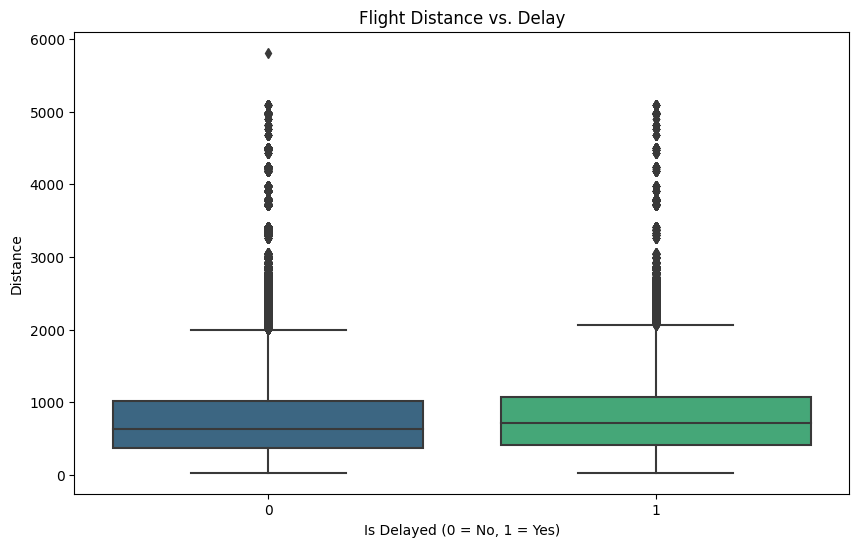

In [14]:
# Scatter plot to analyze the relationship between distance and delay
plt.figure(figsize=(10, 6))
sns.boxplot(x='IS_DELAYED', y='DISTANCE', data=df, palette='viridis')
plt.title('Flight Distance vs. Delay')
plt.xlabel('Is Delayed (0 = No, 1 = Yes)')
plt.ylabel('Distance')
plt.show()


In [15]:
# Select relevant features for modeling
features = ['DISTANCE', 'DEPARTURE_HOUR', 'DELAY_DUE_CARRIER', 
            'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 
            'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

X = df[features]   # Features
y = df['IS_DELAYED']  # Target variable


In [16]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9996751008927763
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    343201
           1       1.00      1.00      1.00     87702

    accuracy                           1.00    430903
   macro avg       1.00      1.00      1.00    430903
weighted avg       1.00      1.00      1.00    430903



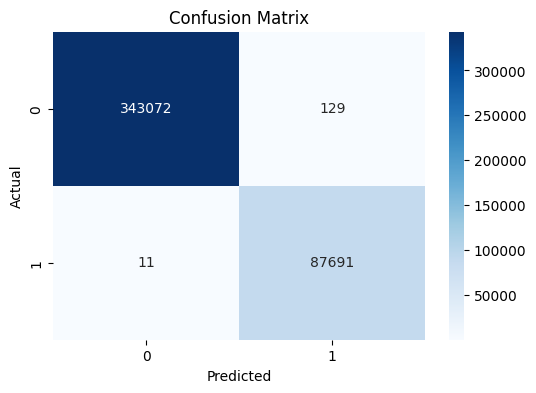

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


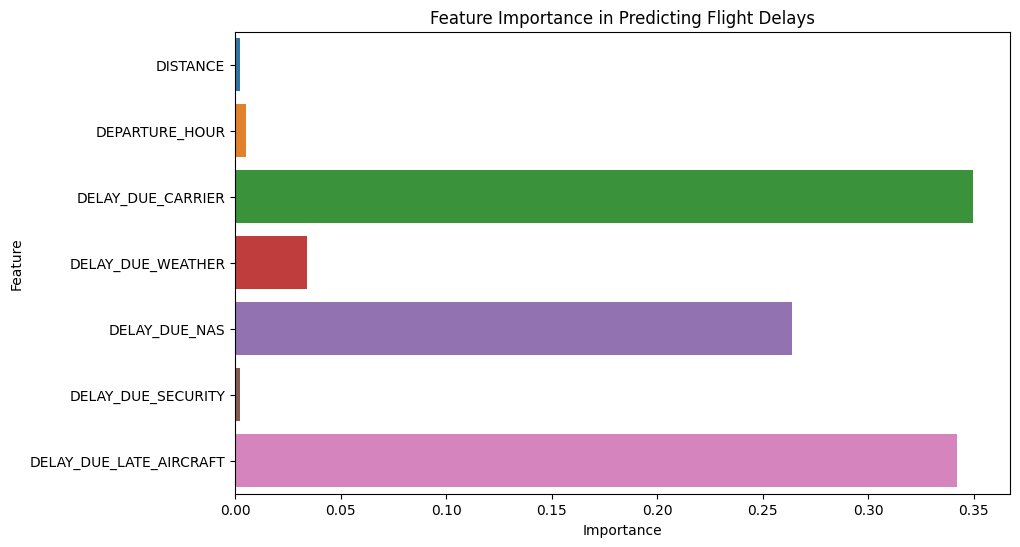

In [19]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Flight Delays')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [20]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [21]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Tries 10 random combinations
    cv=3,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [22]:
# Use 20% of data for faster testing
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.8, random_state=42)
random_search.fit(X_sample, y_sample)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   verbose=2)